In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, 'src')
import demo
import solutions
import test

## Векторные пространства

**Векторное пространство** — непустое множество векторов $V$, алгебраическое поле скаляров $F$, операция сложения векторов $(+) : V \times V \rightarrow V$ и операция умножения векторов на скаляры $(\,\cdot\,) : F \times V \rightarrow V$; причём операции удовлетворяют следующим аксиомам:

* $\forall x, y \in V : x + y = y + x$;
* $\forall x, y, z \in V : x + (y + z) = (x + y) + z$;
* существует такой элемент $\vec{0} \in V$, что $\forall x \in V : x + \vec{0} = x$;
* для любого $x \in V$ существует такой элемент $-x \in V$, что $x + (-x) = \vec{0}$;
* $\forall \alpha, \beta \in F, x \in V : \alpha\left(\beta x\right) = \left(\alpha \beta\right)x$;
* $\forall x \in V : 1 \cdot x = x$;
* $\forall \alpha, \beta \in F, x \in V : \left(\alpha + \beta\right) x = \alpha x + \beta x$;
* $\forall \alpha \in F, x, y \in V : \alpha\left(x + y\right) = \alpha x + \alpha y$.

Набор векторов $\{\vec{e}_i\}_{i=1}^n$ называется **линейно независимым** (ЛНЗ), если его линейная комбинация $\sum_{i=1}^n \alpha_i \vec{e}_i$ равна нулю только в том случае, если она тривиальная, то есть $\forall i : \alpha_i = 0$.

Векторное пространство называется $d$-мерным, если в нём существует набор из $d$ линейно независимых векторов
и не существует набора из $d + 1$ линейно независимого вектора. Набор $d$ линейно независимых векторов будем называть **базисом**.

>В $d$-мерном пространстве любой вектор $\vec{A}$ единственным образом раскладывается в базисе из $d$ линейно независимых векторов $\{\vec{e}_i\}_{i=1}^d$ как $\sum_{i=1}^d\alpha_i\vec{e}_i$.

$\triangleright$
<div style="padding-left:40px">
Действительно, если мы добавим в базис вектор $\vec{A}$, то он обязательно станет линейно зависимым, и, значит, найдутся такие $\beta$ и $\{\alpha_i\}$, что

$$\displaystyle \beta \vec{A} + \sum_{i=1}^d\alpha_i\vec{e}_i=0 \implies
\vec{A} = \sum\limits_{i=1}^d-\frac{\alpha_i}{\beta}\vec{e}_i\text{,}$$

и, значит, разложение существует.<br>

Теперь допустим, что есть два разложения $\sum_{i=1}^d\alpha_i\vec{e}_i=\vec{A}$ и $\sum_{i=1}^d\beta_i\vec{e}_i=\vec{A}$.
Тогда

$$\displaystyle \vec{A} - \vec{A} = \vec{0} = \sum_{i=1}^d(\alpha_i - \beta_i)\vec{e}_i\text{,}$$

однако такое может быть только в том случае, если линейная комбинация тривиальная, то есть
$\alpha_i - \beta_i = 0 \implies \alpha_i = \beta_i \implies$ разложение единственно.
</div>

$\triangleleft$

Вектора можно переводить из одного базиса в другой.
Пусть у нас есть базисы $\{\vec{e}_i\}_{i=1}^d$ и $\{\vec{f}_i\}_{i=1}^d$.

$$
\vec{A} = \sum_{i=1}^d\alpha_i\vec{e}_i = \sum_{i=1}^d\beta_i\vec{f}_i\text{,} \\
\vec{e}_i = \sum_{j=1}^d c_{ij}\vec{f}_j\text{,} \\
\vec{A} = \sum_{i=1}^d\alpha_i\vec{e}_i =
\sum_{i=1}^d \alpha_i \sum_{j=1}^d c_{ij} \vec{f}_j =
\sum_{j=1}^d \vec{f}_j \sum_{i=1}^d \alpha_i c_{ij}\text{,} \\
\beta_j = \sum_{i=1}^d\alpha_i c_{ij}\text{,} \\
\begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \end{pmatrix} =
\begin{pmatrix}
c_{11} & c_{21} & \cdots & c_{d1} \\
c_{12} & c_{22} & \cdots & c_{d2} \\
\vdots & \vdots & \ddots & \vdots \\
c_{1d} & c_{2d} & \cdots & c_{dd}
\end{pmatrix}
\cdot
\begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_d \end{pmatrix}\text{.}
$$

Обозначим матрицу перехода буквой $C$:

$$
\vec\beta = C \cdot \vec\alpha\text{.}
$$

Или если нам даны координаты нового базиса в старом:

$$
\vec{f}_i = \sum_{j=1}^d k_{ij}\vec{e}_j\text{,} \\
\begin{pmatrix}
k_{11} & k_{21} & \cdots & k_{d1} \\
k_{12} & k_{22} & \cdots & k_{d2} \\
\vdots & \vdots & \ddots & \vdots \\
k_{1d} & k_{2d} & \cdots & k_{dd}
\end{pmatrix}
\cdot
\begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \end{pmatrix} =
\begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_d \end{pmatrix}\text{,} \\
K \cdot \vec\beta = \vec\alpha\text{,} \\
\vec\beta = K^{-1} \cdot \vec\alpha\text{,} \\
C = K^{-1}\text{.}
$$

Кроме того, систему координат (СК) можно параллельно переносить. Для получения координат точек в новой СК нужно вычесть из координат старой СК вектор переноса.

In [2]:
def convert(points, new_center=[0, 0], new_e=[(1, 0), (0, 1)]):
    """Получить координаты точек в системе координат с новым центром и новым базисом.
    
    points
        матрица, в которой столбцы - точки.
    
    new_center
        новый центр в виде вектора-строки.
    
    new_e
        матрица, в которой строки - вектора нового базиса."""
    translated = points - np.array(new_center)[np.newaxis].T
    transformed = np.dot(np.linalg.inv(new_e.T), translated)
    return transformed

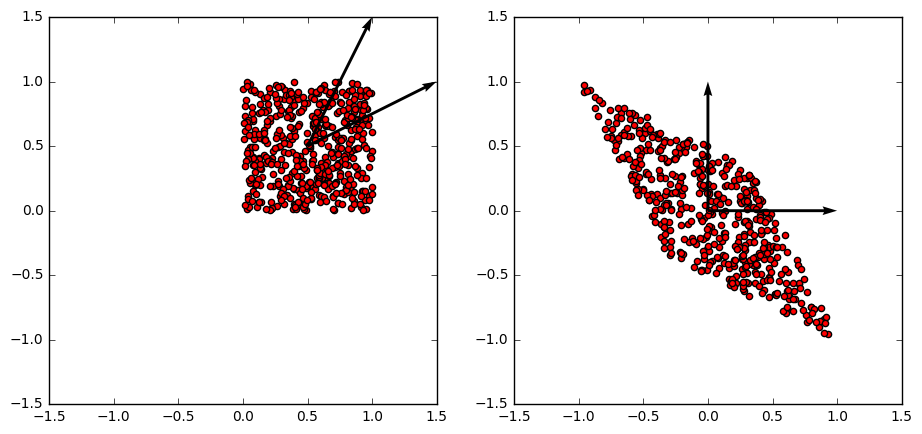

In [3]:
demo.convert_demo(convert, plt)

## Аффинные пространства

Геометрические объекты обычно рассматриваются как множества точек с неким свойством в пространстве точек.
Такие пространства можно моделировать с помощью векторных пространств, однако это не очень удобно.
Например, в векторных пространствах линейные комбинации всегда обязаны содержать нулевой вектор,
и, например, прямая $y=1-x$ не является подпространством $\mathbb R^2$,
что довольно странно с точки зрения геометрии.
Вместо этого мы введём **аффинные пространства**.

Для начала введём понятие **аффинной комбинации**.
Это комбинация точек, сумма коэффициентов которой равна $1$.
Такая комбинация будет примечательна тем, что она не будет зависеть от выбора точки начала координат.
Пусть у нас зафиксированы точки $a$ и $b$.
Рассмотрим их аффинную комбинацию в СК с центром в точке $0$, и в какой-нибудь другой СК с центром в точке $p$.
Она будет задаваться параметром $\lambda$, в первом случае она будет равна
$$0 + \lambda (a - 0) + (1 - \lambda) (b - 0) = \lambda a + (1 - \lambda) b\text{,}$$
и во втором случае она будет равна
$$p + \lambda(a - p) + (1 - \lambda)(b - p) = \lambda a + (1 - \lambda) b\text{.}$$
Такие комбинации инварианты относительно выбора начала координат, что позволяет нам от него избавиться.
Неформально, аффинное пространство можно понимать как векторное пространство, в котором нет начала координат.

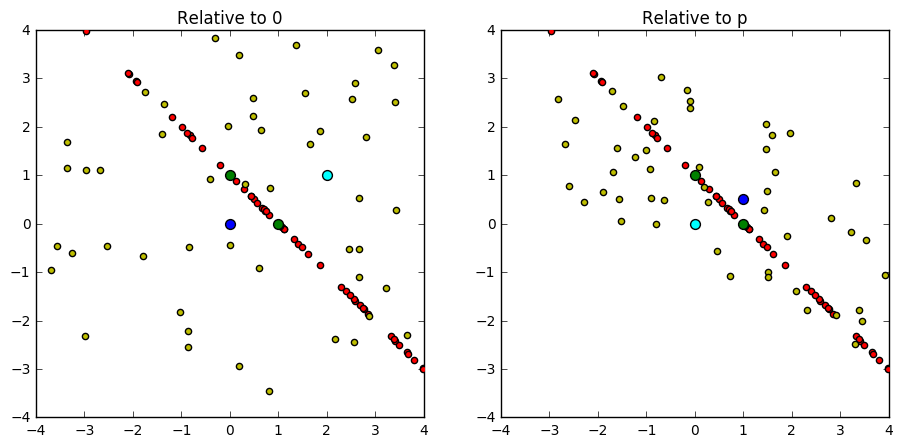

In [4]:
# На самом деле, при двух зафиксированных точках такие комбинации будут давать точки на прямой,
# соединяющей зафиксированные точки.

# При переходе из одной СК в другую
# (красные) точки, задаваемые аффинными комбинациями, сохраняют свои координаты.
demo.affine_demo(convert, plt)

**Аффинное пространство** — это множество точек $A$, множество векторов $V$ и операция $(+) : A \times V \rightarrow A$, удовлетворяющая следующим аксиомам:
- $\forall a \in A : a + 0 = a$;
- $\forall v, w \in V, a \in A : (a + v) + w = a + (v + w)$;
- Для всех $a$ из $A$ отображение $f(v) = a + v$ биективно.

Последняя аксиома позволяет определить разницу двух точек аффинного пространства.

Пусть у нас есть множество точек $\{a_i\}_{i=1}^n$ из $A$
и такое множество скаляров $\{\lambda_i\}_{i=1}^n$, что $\sum_{i=1}^n \lambda_i = 1$.

>$$\displaystyle \forall x, y \in A :
x + \sum_{i=1}^n \lambda_i \cdot \overrightarrow{xa_i} =
y + \sum_{i=1}^n \lambda_i \cdot \overrightarrow{ya_i}$$

$\triangleright$
<div style="padding-left:40px">
$$\displaystyle
\begin{align}
x + \sum_{i \in I} \lambda_i \vec{xa_i}
&= x + \sum_{i \in I} \lambda_i \left(\vec{xy} + \vec{ya_i}\right) \\
&= x + \left(\sum_{i \in I} \lambda_i\right) \vec{xy} + \sum_{i \in I} \lambda_i \vec{ya_i} \\
&= x + \vec{xy} + \sum_{i \in I} \lambda_i \vec{ya_i} \\
&= y + \sum_{i \in I} \lambda_i \vec{y a_i}
\end{align}
$$
</div>

$\triangleleft$

Не зависящая от выбора $x \in A$ точка
$$x + \sum_{i=1}^n \lambda_i \cdot \overrightarrow{xa_i} \overset{\mathrm{def}}{=} \sum_{i=1}^n \lambda_i a_i\text{,}$$
называется **аффинной комбинацией** точек $\{a_i\}_{i=1}^n$ с весами $\{\lambda_i\}_{i=1}^n$.

Можно ввести понятия аффинно независимых точек. Пусть $\langle A, V, (+)\rangle$ — это аффинное пространство. Множество точек $\{a_i\}_{i \in I}$ **аффинно независимо**, если для любого $i \in I$ множество $\{\overrightarrow{a_i a_j}\}_{j \in I \setminus \{i\}}$ линейно независимо.

Можно показать, что если существует хотя бы одно такое $i$, то проводя вектора от любой из точек будут получаться линейно независимые вектора.

В аффинных пространствах нет выделенного начала координат, и аффинные подпространства (множества аффинных комбинаций) уже не обязаны его содержать. Например, в них $y=1-x$ является подпространством аффинного пространства над $\mathbb R^2$.

## Ориентация

Одна из основных операций, которой мы будем пользоваться — предикат поворота, позволяющий определять относительное положение точек в пространстве.

Пусть в нашем $d$ мерном пространстве есть $d$ аффинно независимых точек $a_1, a_2, \ldots, a_d$, однозначно задающих гиперплоскость.
Рассмотрим положение новой точки $p$ относительно этой гиперплоскости.

<center><img src="img/turn3d.png"/></center>
<center><br><font size="2"><i>Вектора нового базиса</i></font></center>

Для этого рассмотрим определитель матрицы перехода из базиса $\{a_i-p\}_{i=1}^d$ в исходный базис:

$$ \det M^\mathrm T =
\begin{vmatrix}
a_1 - p \\ a_2 - p \\ \vdots \\ a_n - p
\end{vmatrix}
= \begin{vmatrix}
a_1 - p & 0 \\ a_2 - p & 0 \\ \vdots & \vdots \\ a_n - p & 0 \\ p & 1
\end{vmatrix}
= \begin{vmatrix}
a_1 & 1 \\ a_2 & 1 \\ \vdots & \vdots \\ a_n & 1 \\ p & 1
\end{vmatrix}\text{.}
$$

Заметим, что точка $p$ принадлежит гиперплоскости тогда и только тогда, когда $\det M^\mathrm T = 0$.
Действительно, если $p$ лежит в гиперплоскости, то набор векторов $\{a_i-p\}_{i=1}^d$ будет линейно зависим, и определитель будет равняться нулю, и наоборот.

Теперь разделим всё пространство, кроме точек плоскости, на два множества в зависимости от знака определителя.
Покажем, что получившиеся множества будут выпуклыми.
По определению выпуклого множества надо проверить,
что если точки $p_1$ и $p_2$ лежат в нём, то и все точки между ними $p_1 + \lambda \cdot \overrightarrow{p_1 p_2}$, где $\lambda \in [0,1]$, тоже будут лежать в нём.
Если подставить это выражение в определитель, и вспомнить, что $1 = \lambda + (1 - \lambda)$, то получим

$$
\begin{vmatrix}
a_1 & 1 \\
a_2 & 1 \\
\vdots & \vdots \\
a_d & 1 \\
p_1 + \lambda \cdot \overrightarrow{p_1 p_2} & 1
\end{vmatrix} =
\begin{vmatrix}
a_1 & 1 \\
a_2 & 1 \\
\vdots & \vdots \\
a_d & 1 \\
\lambda p_2 + (1 - \lambda)p_1 & 1
\end{vmatrix} =
\lambda \begin{vmatrix}
a_1 & 1 \\
a_2 & 1 \\
\vdots & \vdots \\
a_d & 1 \\
p_2 & 1
\end{vmatrix} +
(1 - \lambda) \begin{vmatrix}
a_1 & 1 \\
a_2 & 1 \\
\vdots & \vdots \\
a_d & 1 \\
p_1 & 1
\end{vmatrix} =
\lambda d_2 + (1 - \lambda) d_1
\text{.}
$$

$d_1$ и $d_2$ по предположению имеют одинаковый знак, и коэффициенты при них положительны.
Значит, результат будет того же знака.

Кроме того, можно показать, что отрезок, соединяющий точки $p_1$ и $p_2$ из двух множеств, будет проходить через гиперплоскость.
Любая точка на прямой, соединяющей $p_1$ и $p_2$ выражается формулой $p_1 + \lambda \cdot \overrightarrow{p_1 p_2}$.
Определитель для такой точки будет точно так же равен $\lambda d_2 + (1 - \lambda) d_1$.
Найдём значения $\lambda$, при котором определитель равен нулю, то есть соответствующая точка будет лежать в гиперплоскости.

$$
\lambda d_2 + (1 - \lambda) d_1 = 0 \text{,} \\
\lambda (d_1 - d_2) + d_2 = 0 \text{,} \\
\lambda = \frac{-d_2}{d_1 - d_2} = \frac{d_2}{d_2 - d_1} \text{.}
$$

- Если $d_2 > 0$, то по предположению $d_1 < 0$ и $d_2 - d_1 > d_2$.
- Если $d_2 < 0$, то по предположению $d_1 > 0$ и $d_2 - d_1 < d_2$.

В обоих случаях $0 < \lambda < 1$, что значит, что соответствующая точка лежит на отрезке $p_1 p_2$.

Получается, что с помощью такого определителя можно задавать полупространства и проверять положение точек относительно друг друга.
Знак определителя будет отвечать за поворот.
Можно условиться называть поворот "левым", если знак определителя равен $1$, и "правым" если он равен $-1$.

### Пример: проверка многоугольника на выпуклость
Для проверки многоугольника на выпуклость достаточно проверить, что повороты троек последовательных в порядке обхода вершин совпадают.

### Упражнение: предикат поворота
Реализуйте предикат поворота самостоятельно, без использования библиотеки <code>numpy</code>. Добейтесь того, чтобы ваша функция работала так же, как функция <code>solutions.orientation</code>. Для простоты считайте, что размерность пространства не очень велика.

In [5]:
def orientation(points, p):
    """Возвращает ориентацию точки p относительно точек points (0, 1 или -1)."""
    return solutions.orientation(points, p)

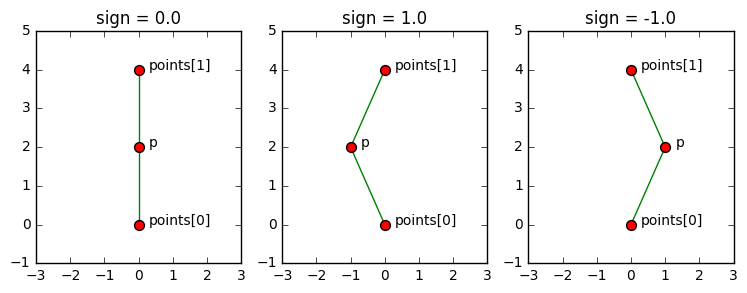

In [6]:
# Демонстрация работы на трёх тестах
test.orientation_demo(plt, orientation)

Пример для невыпуклого многоугольника.

expected = False, actual = False
correct


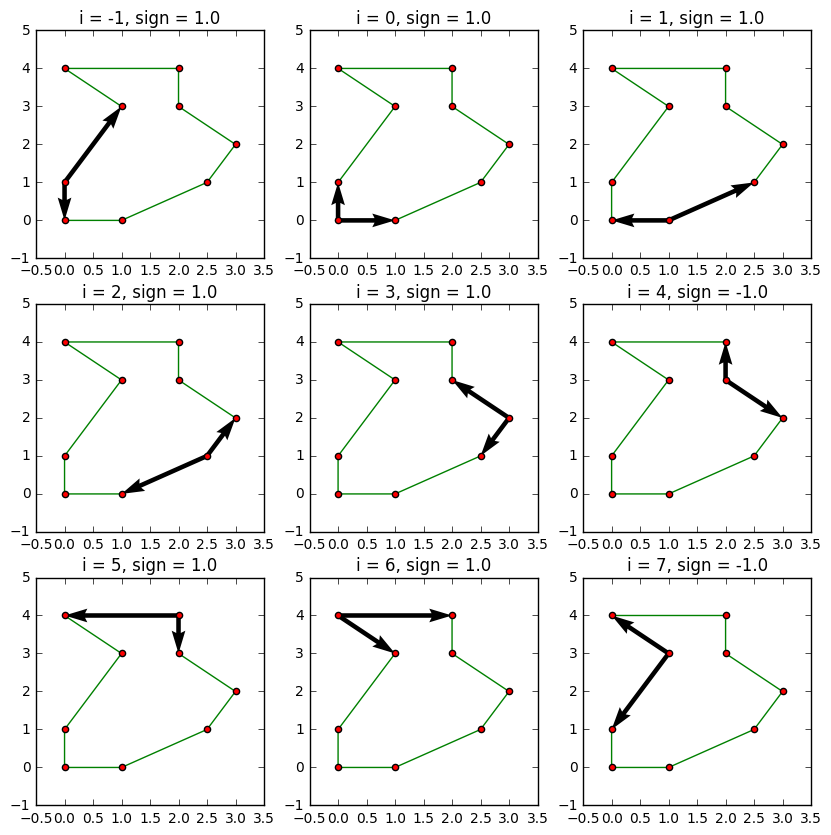

In [7]:
non_convex_polygon = np.array([
        [0, 0],
        [1, 0],
        [2.5, 1],
        [3, 2],
        [2, 3],
        [2, 4],
        [0, 4],
        [1, 3],
        [0, 1]])

test.check_polygon(plt, orientation, non_convex_polygon, False)

Пример для выпуклого многоугольника.

expected = True, actual = True
correct


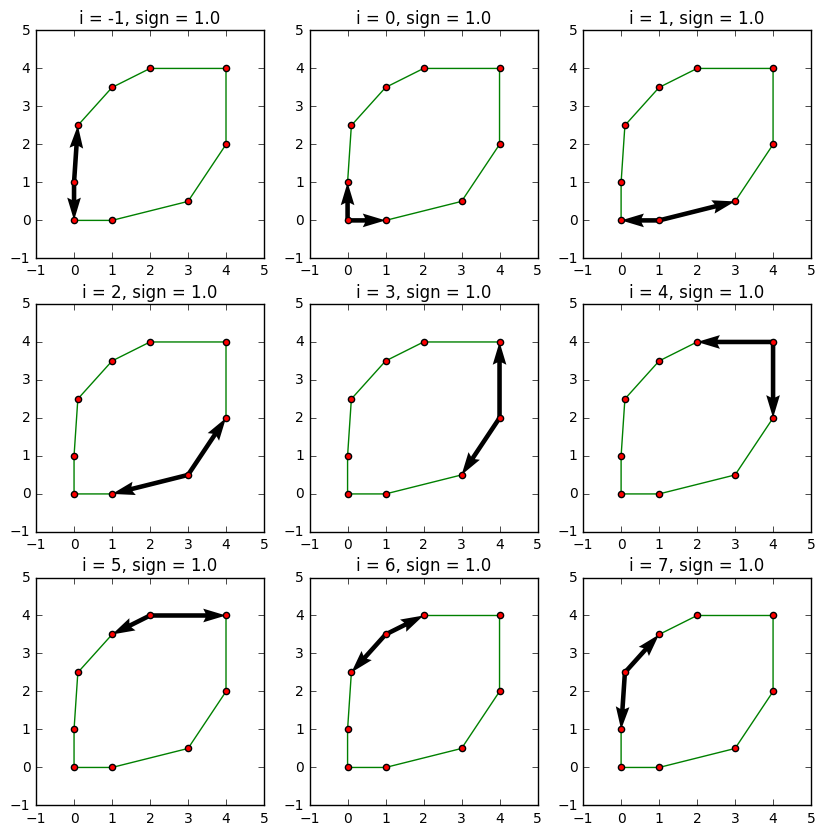

In [8]:
convex_polygon = np.array([
        [0, 0],
        [1, 0],
        [3, 0.5],
        [4, 2],
        [4, 4],
        [2, 4],
        [1, 3.5],
        [0.1, 2.5],
        [0, 1]])

test.check_polygon(plt, orientation, convex_polygon, True)

Тесты для больших размерностей.

In [9]:
test.orientation_test(orientation, solutions.orientation)

correct


### Расчёт погрешностей предиката на плоскости

У реализованного нами предиката поворота есть проблема.
Попробуем посчитать поворот точек $p_1 = (1.1016, 8.1672)$, $p_2 = -p_1$ и $p_3 = 4 \cdot p_1$:

In [10]:
p1 = np.array((1.1016, 8.1672))
p2 = -p1
p3 = p1 * 4
print(orientation((p1, p2), p3))

1.0


Несмотря на то, что точки лежат на одной прямой, результат не равен нулю.
Проблема кроется в ограниченной точности арифметики с плавающей точкой.
Достаточно часто реализацию алгоритмов вычислительной геометрии затрудняют такие вычисления, так как их погрешность приводит к нарушению инвариантов алгоритма. 

Для точного вычисления предиката поворота можно было бы воспользоваться длинной арифметикой,
однако она сильно замедлила бы работу почти всех геометрических алгоритмов.
Заметим, что три случайные точки довольно редко лежат на одной прямой,
то есть для большинства случаев точности арифметики с плавающей точкой должно хватить.
Если бы мы могли отличать (пусть и довольно грубо) случаи, в которых алгоритм точно выдаёт правильный результат,
от случаев, в которых он может совершить ошибку,
то можно было бы пересчитывать поворот с помощью длинной арифметики только тогда, когда это нужно,
и в среднем вычисление поворота не сильно бы замедлилось.

Двоичное число с плавающей точкой представляется в виде

$$a = \pm 1.a_1a_2a_3 \dots a_{p - 1} \times 2^\gamma,\quad a_i \in \{ 0, 1 \}\text{.}$$

Обозначим за $D$ множество всех чисел c плавающей точкой, операции над ними (в противовес обычным операциям над вещественными числами) обычно обозначают как $\oplus$, $\ominus$ и $\otimes$.
Машинный эпсилон $\varepsilon = 2^{-p}$.
Тогда погрешности операций для любых $a, b \in D$ при условии округления к ближайшему можно выразить следующим образом:

$$
\left(a \oplus b\right) = \left(a + b\right) \cdot \left(1 + \delta\right), \quad\left|\ \delta\ \right| \leqslant \varepsilon\text{;} \\
\left(a \ominus b\right) = \left(a - b\right) \cdot \left(1 + \delta\right), \quad\left|\ \delta\ \right| \leqslant \varepsilon\text{;} \\
\left(a \otimes b\right) = \left(a \times b\right) \cdot \left(1 + \delta\right), \quad\left|\ \delta\ \right| \leqslant \varepsilon\text{.}$$

Определители матрицы перехода для точки $a$ относительно точек $b$ и $c$ без погрешностей и в числах с плавающей точкой:

$$
v=\left(\vphantom{b_y}b - a\right) \times \left(\vphantom{b_y}c - a\right)
= \left(\vphantom{b_y}b_x - a_x\right) \left(c_y - a_y\right) - \left(b_y - a_y\right) \left(\vphantom{b_y}c_x - a_x\right)\text{,}\\
\widetilde{v} = \left(\vphantom{b_y}b_x \ominus a_x\right) \otimes \left(c_y \ominus a_y\right) \ominus \left(b_y \ominus a_y\right) \otimes \left(\vphantom{b_y}c_x \ominus a_x\right)\text{.}
$$

Попробуем найти такую функцию $e(a, b, c)$, что $\widetilde v - e \leqslant v \leqslant \widetilde v + e$.
Для неё будет справедливо следующее утверждение:

$$ \displaystyle
\forall a, b, c \in D^2:
 \begin{cases}
   \widetilde{v} > e &\implies \left(b - a\right) \times \left(c - a\right) > 0\\
   \widetilde{v} < -e &\implies \left(b - a\right) \times \left(c - a\right) < 0
 \end{cases}\text{.}
$$

<center><img src="img/error.png"/></center>
<center><br><font size="2"><i>Искомая функция ограничивает разницу между точным и посчитанным значениями</i></font></center>

$$\displaystyle
\begin{align}
\widetilde{v} 
&= \left(\vphantom{b_y}b_x \ominus a_x\right) \otimes \left(c_y \ominus a_y \right) \ominus \left(b_y \ominus a_y \right) \otimes \left(\vphantom{b_y}c_x \ominus a_x\right)\\
&= \left[ \left(\vphantom{b_y}b_x - a_x\right) \left(c_y - a_y\right) \left(\vphantom{b_y}1 + \delta_1\right) \left(\vphantom{b_y}1 + \delta_2\right) \left(\vphantom{b_y}1 + \delta_3\right)\right. \\
    &\phantom{=}\qquad \left. - \left(b_y - a_y\right) \left(\vphantom{b_y}c_x - a_x\right) \left(\vphantom{b_y}1 + \delta_4\right) \left(\vphantom{b_y}1 + \delta_5\right) \left(\vphantom{b_y}1 + \delta_6 \right) \right] \left(\vphantom{b_y}1 + \delta_7\right)\text{,}
\end{align}\\[20pt]
\left|\ \delta_i\ \right|\leqslant \varepsilon\text{.}
$$

Заметим, что $v \approx \widetilde{v}$.
Оценим абсолютную погрешность $\left|\ \vphantom{b_y^4}v - \widetilde{v}\ \right| $:

$$
\begin{align}
&\vphantom{=} \left|\ \vphantom{b_y^4}v - \widetilde{v}\ \right| \\
&= \left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right) - \left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right) \right. \\
    &\phantom{=}\qquad - \left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right) \left(\vphantom{b_y^4}1 + \delta_1\right) \left(\vphantom{b_y^4}1 + \delta_2\right) \left(\vphantom{b_y^4}1 + \delta_3\right) \left(\vphantom{b_y^4}1 + \delta_7\right) \\
    &\phantom{=}\qquad\left. + \left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right) \left(\vphantom{b_y^4}1 + \delta_4\right) \left(\vphantom{b_y^4}1 + \delta_5\right) \left(\vphantom{b_y^4}1 + \delta_6\right) \left(\vphantom{b_y^4}1 + \delta_7\right)\right| \\
&= \left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right) \left(\vphantom{b_y^4}1 - \left(\vphantom{b_y^4}1 + \delta_1\right) \left(\vphantom{b_y^4}1 + \delta_2\right) \left(\vphantom{b_y^4}1 + \delta_3\right) \left(\vphantom{b_y^4}1 + \delta_7\right)\right) \right. \\
    &\phantom{=}\qquad\left. - \left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right) \left(\vphantom{b_y^4}1 - \left(\vphantom{b_y^4}1 + \delta_4\right) \left(\vphantom{b_y^4}1 + \delta_5\right) \left(\vphantom{b_y^4}1 + \delta_6\right) \left(\vphantom{b_y^4}1 + \delta_7\right)\right)\right| \\ 
&\leqslant \left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right) \left(\vphantom{b_y^4}1 - \left(\vphantom{b_y^4}1 + \delta_1\right) \left(\vphantom{b_y^4}1 + \delta_2\right) \left(\vphantom{b_y^4}1 + \delta_3\right) \left(\vphantom{b_y^4}1 + \delta_7\right)\right)\right| \\
    &\phantom{=}\qquad + \left|\left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right) \left(\vphantom{b_y^4}1 - \left(\vphantom{b_y^4}1 + \delta_4\right) \left(\vphantom{b_y^4}1 + \delta_5\right) \left(\vphantom{b_y^4}1 + \delta_6\right) \left(\vphantom{b_y^4}1 + \delta_7\right)\right)\right| \\ 
&= \left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right)\right| \cdot \left|\left(\left(\vphantom{b_y^4}1 + \delta_1\right) \left(\vphantom{b_y^4}1 + \delta_2\right) \left(\vphantom{b_y^4}1 + \delta_3\right) \left(\vphantom{b_y^4}1 + \delta_7\right) - 1\right)\right| \\
    &\phantom{=}\qquad + \left|\left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right)\right| \cdot \left|\left(\left(\vphantom{b_y^4}1 + \delta_4\right) \left(\vphantom{b_y^4}1 + \delta_5\right) \left(\vphantom{b_y^4}1 + \delta_6\right) \left(\vphantom{b_y^4}1 + \delta_7\right) - 1\right)\right| \\ 
&= \left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right)\right| \cdot \left|\vphantom{b_y^4}\delta_1 + \delta_2 + \delta_3 + \delta_7 + \delta_1 \delta_2 +\ldots\right| + \\
    &\phantom{=}\qquad + \left|\left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right)\right| \cdot \left|\vphantom{b_y^4}\delta_4 + \delta_5 + \delta_6 + \delta_7 + \delta_4 \delta_5 +\ldots\right| \\
&\leqslant \left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right)\right| \cdot \left(\vphantom{b_y^4}\left|\delta_1\right| + \left|\delta_2\right| + \left|\delta_3\right| + \left|\delta_7\right| + \left|\delta_1 \delta_2\right| +\ldots\right) \\
    &\phantom{=}\qquad + \left|\left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right)\right| \cdot \left(\vphantom{b_y^4}\left|\delta_4\right| + \left|\delta_5\right| + \left|\delta_6\right| + \left|\delta_7\right| + \left|\delta_4 \delta_5\right| +\ldots\right) \\
&\leqslant \left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right)\right| \cdot \left(\vphantom{b_y^4}4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\right) \\
    &\phantom{=}\qquad + \left|\left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right)\right| \cdot \left(\vphantom{b_y^4}4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\right) \\ 
&= \left(\left|\left(\vphantom{b_y^4}b_x - a_x\right) \left(\vphantom{b_y^4}c_y - a_y\right)\right| + \left|\left(\vphantom{b_y^4}b_y - a_y\right) \left(\vphantom{b_y^4}c_x - a_x\right)\right|\right)\left(\vphantom{b_y^4}4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\right)\text{.}
\end{align}
$$

Мы получили возможный вариант функции $e$ в вещественных числах,
однако такой вариант не учитывает погрешности, возникающие при её вычислении.

$$\displaystyle
t = \left|\left(\vphantom{b_y}b_x - a_x\right) \left(c_y - a_y\right)\right| + \left|\left(b_y - a_y\right) \left(\vphantom{b_y}c_x - a_x\right)\right|\text{,} \\
\widetilde{t} = \left|\left(\vphantom{b_y}b_x \ominus a_x\right) \otimes \left(c_y \ominus a_y\right)\right| \oplus \left|\left(b_y \ominus a_y\right) \otimes \left(\vphantom{b_y}c_x \ominus a_x\right)\right|\text{,} \\[10pt]
\left|\ \vphantom{b_y}v - \widetilde{v}\ \right| \leqslant t \cdot \left(\vphantom{b_y}4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\right)\text{,}\\[10pt]
\begin{align}
	\widetilde{t}
    &= \bigl[\ \left|\left(\vphantom{b_y}b_x - a_x\right) \left(\vphantom{b_y}c_y - a_y\right) \left(\vphantom{b_y}1 + \delta_1\right) \left(\vphantom{b_y}1 + \delta_2\right) \left(\vphantom{b_y}1 + \delta_3\right)\right| \bigr. \\
        &\phantom{=}\qquad + \bigl.\left|\left(\vphantom{b_y}b_y - a_y\right) \left(\vphantom{b_y}c_x - a_x\right) \left(\vphantom{b_y}1 + \delta_4\right) \left(\vphantom{b_y}1 + \delta_5\right) \left(\vphantom{b_y}1 + \delta_6\right)\right|\ \bigr] \left(\vphantom{b_y}1 + \delta_7\right) \\
	&\geqslant \left|\left(\vphantom{b_y}b_x - a_x\right) \left(\vphantom{b_y}c_y - a_y\right) \left(\vphantom{b_y}1 - \varepsilon\right)^3\right| \cdot \left(\vphantom{b_y}1 - \varepsilon\right) \\
        &\phantom{=}\qquad + \left|\left(\vphantom{b_y}b_y - a_y\right) \left(\vphantom{b_y}c_x - a_x\right) \left(\vphantom{b_y}1 - \varepsilon\right)^3\right| \cdot \left(\vphantom{b_y}1 - \varepsilon\right) \\
	&= \left|\left(\vphantom{b_y}b_x - a_x\right) \left(\vphantom{b_y}c_y - a_y\right)\right| \cdot \left(\vphantom{b_y}1 - \varepsilon\right)^4 \\
        &\phantom{=}\qquad + \left|\left(\vphantom{b_y}b_y - a_y\right) \left(\vphantom{b_y}c_x - a_x\right)\right| \cdot \left(\vphantom{b_y}1 - \varepsilon\right)^4\\
	&= \left(\left|\left(\vphantom{b_y}b_x - a_x\right) \left(\vphantom{b_y}c_y - a_y\right)\right| + \left|\left(\vphantom{b_y}b_y - a_y\right) \left(\vphantom{b_y}c_x - a_x\right)\right|\right) \cdot \left(\vphantom{b_y}1 - \varepsilon\right)^4 \\
	&= t \cdot \left(\vphantom{b_y}1 - \varepsilon\right)^4\text{,}
\end{align} \\
t \leqslant \frac{\widetilde{t}}{(1 - \varepsilon)^4} \text{,}
$$

$$ \displaystyle
\begin{align}
    \left|\vphantom{b_y}\ v - \widetilde{v}\ \right|
	&\leqslant \widetilde{t} \cdot \frac{4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4}{\left(\vphantom{b_y}1 - \varepsilon\right)^4} = \\
	&= \widetilde{t} \cdot \left(\vphantom{b_y}4 \varepsilon + 6 \varepsilon^2 + 4 \varepsilon^3 + \varepsilon^4\right) \cdot \left(\vphantom{b_y}1 + 4 \varepsilon + 10 \varepsilon^2 + 20 \varepsilon^3 + O\!\left(\vphantom{b_y}\varepsilon^4\right)\right) \leqslant \\
	&\leqslant \widetilde{t} \cdot 8 \varepsilon\text{.}
\end{align}
$$

Таким образом, в качестве $e$ подойдёт

$$ \displaystyle
e = \left|\left(\vphantom{b_y}b_x \ominus a_x\right) \otimes \left(c_y \ominus a_y\right)\right| \oplus \left|\left(b_y \ominus a_y\right) \otimes \left(\vphantom{b_y}c_x \ominus a_x\right)\right| \cdot 8 \varepsilon\text{.}
$$

Последнее умножение на $8\varepsilon$ считается без погрешностей, так как это степень двойки. С учетом полученных результатов, предикат будет выглядеть так:

In [11]:
from fractions import *

def calculate_arg(a, b):
    return abs(a[0] * b[1]) + abs(b[1] * a[0])

def orientation_exact(a, b, c):
    ca = a - c
    cb = b - c
    e = 8 * np.finfo(float).eps * calculate_arg(ca, cb)
    det = ca[0] * cb[1] - ca[1] * cb[0]
    if det > e:
        return 1
    if det < -e:
        return -1

    lc = (Fraction(c[0]), Fraction(c[1]))
    la = (Fraction(a[0]) - lc[0], Fraction(a[1]) - lc[1])
    lb = (Fraction(b[0]) - lc[0], Fraction(b[1]) - lc[1])
    ldet = la[0] * lb[1] - la[1] * lb[0]
    if ldet > 0:
        return 1
    if ldet < 0:
        return -1
    return 0

Теперь если мы посчитаем поворот точек $p_1$, $p_2$ и $p_3$, то получим верный результат:

In [12]:
print(orientation_exact(p1, p2, p3))

0


### Интервальная арифметика

Современные процессоры позволяют менять режим округления при операциях над числами с плавающей точкой.
С помощью этого можно максимально точно вычислять промежуток, в котором находится точное значение выражения,
вычисленного арифметикой с плавающей точкой.
Вместо одного числа можно хранить пару чисел, задающих интервал (отсюда и название) возможных значений.
Операции над ними определяются довольно просто:

$$
[a, b] + [c, d] = [a \underline{\oplus} c, b \overline{\oplus} d]\text{,} \\
[a, b] - [c, d] = [a \underline{\ominus} d, b \overline{\ominus} c]\text{,} \\
[a, b] \times [c, d] = [\min(a \underline{\otimes} c, a \underline{\otimes} d, b \underline{\otimes} c, b \underline{\otimes} d), \max(a \overline{\otimes} c, a \overline{\otimes} d, b \overline{\otimes} c, b \overline{\otimes} d)]\text{,} \\
[a, b] \mathbin{/} [c, d] = [\min(a \underline{\oslash} c, a \underline{\oslash} d, b \underline{\oslash} c, b \underline{\oslash} d), \max(a \overline{\oslash} c, a \overline{\oslash} d, b \overline{\oslash} c, b \overline{\oslash} d)]\text{.} \\
$$

Символы $\underline\odot$ и $\overline\odot$ обозначают операции $\odot$ с округлением в меньшую и в большую стороны соответственно.

Интервальная арифметика работает заметно медленнее обычных вычислений,
однако всё ещё быстрее длинной арифметики.
Её можно использовать при вычислении предиката поворота как промежуточный этап между обычным вычислением с грубой оценкой погрешности и длинной арифметикой:
если обе границы посчитанного для определителя интервала будут одного знака, то и знак определителя гарантировано будет того же знака,
а к длинной арифметике будем прибегать только тогда, когда интервал содержит в себе ноль.

Наиболее известная реализация интервальной арифметики с точным вычислением погрешностей это

<code><a href="http://www.boost.org/doc/libs/1_63_0/libs/numeric/interval/doc/interval.htm">boost/numeric/interval</code>

для C++. Для Python подобной реализации, к сожалению, нет.

## Пересечение отрезков на плоскости

С помощью предиката поворота можно проверять, пересекаются ли два отрезка. Ясно, что отрезки пересекаются тогда и только тогда, когда для каждого из отрезков его точки не лежат с одной стороны от второго отрезка, это проверяется предикатом поворота.

<center><img src="img/intersection_cases.png"></center>

Отдельно следует рассмотреть случай, когда отрезки находятся на одной прямой. В таком случае все повороты в вышеописанной проверке будут равны нулю, и нужно сделать дополнительные проверки отрезков на наложение. Отрезки будут пересекаться, если будут пересекаться их проекции на ось $x$ и на ось $y$.

<center><img src="img/bounding_box.png"></center>

### Упражнение: пересечение отрезков на плоскости
Реализуйте проверку пересечения отрезков самостоятельно. Добейтесь того, чтобы ваша функция работала так же, как функция <code>solutions.do_intersect</code>. Вы можете пользоваться функцией <code>orientation_exact</code>.

In [13]:
def do_intersect(a, b, c, d):
    """Возвращает True, если отрезки ab и cd пересекаются."""
    return solutions.do_intersect(a, b, c, d)

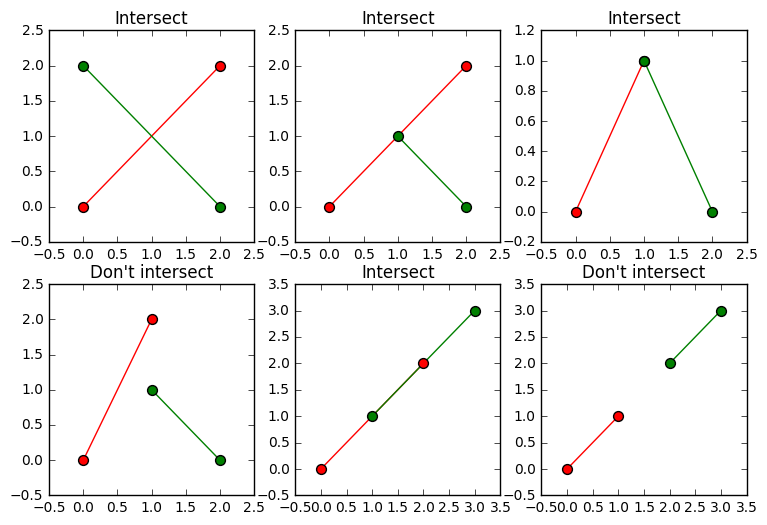

In [14]:
test.intersection_demo(plt, do_intersect)

Случайные тесты.

In [15]:
test.intersection_test(do_intersect, solutions.do_intersect)

correct


## Объём

Объём — это сопоставляемая фигуре численная характеристика, такая, что:
- У одинаковых фигур равные объёмы (объём не меняется при движении фигуры как твердого целого);
- Если одна фигура состоит из двух, то её объём равен сумме объёмов её частей.

За единицу объёма принимается объём n-мерного куба с ребром, равным единице.
Пусть $\chi(x_1, \dots, x_n)$ — характеристическая функция геометрического образа тела,
то есть такая функция, что $\chi(x_1, \dots, x_n) = 1$, если точка $\left(x_1,\dots,x_n\right)$ принадлежит фигуре,
и $\chi(x_1, \dots, x_n) = 0$ в обратном случае.
Объём произвольного тела определяется как интеграл

$$
\displaystyle \idotsint\limits_{\mathbb{R}^n}\chi(x_1, \dots, x_n)\mathrm dx_1\dots \mathrm dx_n\text{.}
$$

#### Теорема
Пусть даны две n-мерные области:
$(D)$ в пространстве $x_1 x_2\dots x_n$ и $(\Delta)$ в пространстве $\xi_1\xi_2\dots\xi_n$,
ограниченные каждая одной непрерывной — гладкой или кусочно-гладкой — поверхностью.
Между ними с помощью формул
$$
\begin{cases}
x_1 = x_1(\xi_1,\xi_2,\dots,\xi_n); \\
x_2 = x_2(\xi_1,\xi_2,\dots,\xi_n); \\
\dots \\
x_n = x_n(\xi_1,\xi_2,\dots,\xi_n); 
\end{cases}
$$
устанавливается взаимно однозначное соответствие.
Тогда, при обычных предположениях относительно производных
и сохранения знака якобианом
$$
J =
\begin{vmatrix}
\dfrac{\partial x_1}{\partial \xi_1} & \dfrac{\partial x_2}{\partial \xi_1} & \cdots & \dfrac{\partial x_n}{\partial \xi_1}  \\
\dfrac{\partial x_1}{\partial \xi_2} & \dfrac{\partial x_2}{\partial \xi_2} & \cdots &\dfrac{\partial x_n}{\partial \xi_2}  \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial x_1}{\partial \xi_n} & \dfrac{\partial x_2}{\partial \xi_n} & \cdots &\dfrac{\partial x_n}{\partial \xi_n} \end{vmatrix}\text{,}
$$
интеграл от непрерывной в $(D)$ функции $f(x_1, x_2, \dots, x_n)$
может быть преобразован по формуле
$$
\displaystyle \idotsint\limits_{(D)}f(x_1, \dots, x_n)\mathrm dx_1\dots \mathrm dx_n =
\idotsint\limits_{(\Delta)}f(x_1(\xi_1,\xi_2,\dots,\xi_n), \dots, x_n(\xi_1,\xi_2,\dots,\xi_n))
|J|\mathrm d\xi_1\dots \mathrm d\xi_n\text{.}
$$

### Пример: объём параллелепипеда
Пусть параллелепипед задаётся точкой $p$ и ЛНЗ векторами $\{\vec{a_i}\}_{i=0}^n$.

$\chi(x_1, \dots, x_n)$ — его характеристическая функция.
Для вычисления объёма сначала сместим начало системы координат в точку $p$,
а затем заменим базис на $\{\vec{a_i}\}_{i=0}^n$.
В новой системе координат параллелепипед будет областью $\left[0,1\right]^n$.

$$
\displaystyle
x_i = \sum_{j=1}^n (a_j - p)_i \xi_j \text{,}\\
\frac{\partial x_i}{\partial \xi_j} = (a_j - p)_i \text{,}\\
J = \begin{vmatrix}
(a_1 - p)_1 & (a_1 - p)_2 & \cdots & (a_1 - p)_n\\
(a_2 - p)_1 & (a_2 - p)_2 & \cdots &(a_2 - p)_n\\
\vdots & \vdots & \ddots & \vdots\\
(a_n - p)_1 & (a_n - p)_2 & \cdots &(a_n - p)_n
\end{vmatrix}
= \begin{vmatrix}
a_1 - p \\ a_2 - p\\
\vdots \\
a_n - p
\end{vmatrix}
= \begin{vmatrix}
a_1 & 1 \\
a_2 & 1 \\
\vdots & \vdots \\
a_n & 1 \\
p & 1
\end{vmatrix} \text{,}\\
\idotsint\limits_{\mathbb{R}^n}\chi(x_1, \dots, x_n)\mathrm dx_1\dots \mathrm dx_n =
\idotsint\limits_{\left[0,1\right]^n}\left|J\right|\mathrm d\xi_1 \dots \mathrm d\xi_n = \left|J\right|\text{.}
$$

### Упражнение: объём симплекса
Посчитайте объём множества $\left\{\left(x_1,\ldots,x_n\right) \mid \forall i : x_i \geq 0, \sum_{i=1}^n x_i \leq a\right\}$ в общем случае для любых $n$ и $a$. Оно задаёт $n$-мерный симплекс. При $n=2$ это будет треугольник, при $n=3$ — тетраэдр и так далее.

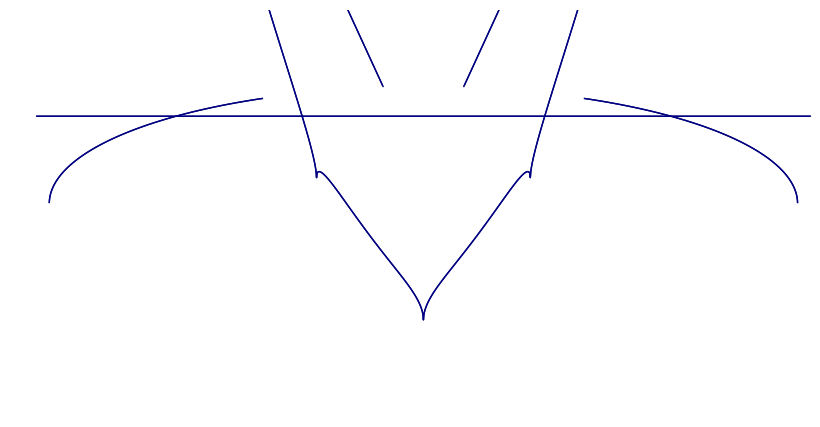

In [16]:
def volume(a, n):
    return 1 # Впишите ответ

# Запустите для проверки ответа
plt.figure(figsize=(10, 5))
plt.axis('off')
test.batman(plt, volume)

### Пример: объём многогранника

С помощью формулы объёма симплекса можно посчитать объём многогранника.
Пусть нам дан многогранник, нормали граней которого ориентированы наружу.
Возьмём какую-нибудь точку $O$ (например, нулевую), и соединим вершины каждой грани с точкой $O$.
Таким образом каждая грань достроится до симплекса.
Введём понятие **ориентированного объёма** симплекса — это объём симплекса, домноженный на поворот точки $O$ относительно грани.
Если сложить ориентированные объёмы всех полученных симплексов, то мы получим объём многогранника.

<center><img src="img/area.png"/></center>
<center><br><font size="2"><i>Чётность количества пересечений луча и многогранника зависит от принадлежности точки многограннику</i></font></center>

Для того чтобы понять, что это так, рассмотрим произвольную точку в пространстве $P$ и проведём луч от неё по вектору $v=\vec{OP}$.
Грани многогранника, которые пересекает построенный луч, это те грани, симплексы которых содержали в себе точку $P$.
Если пересечений нет, то это значит, что точка $P$ лежит вне многогранника.
Если пересечения есть, то нормаль последней пересечённой грани даёт с вектором $v$ острый угол, значит, объём симплекса с этой гранью был посчитан со знаком плюс.
Нормаль предпоследней пересечённой грани даёт тупой угол с вектором $v$, значит, соответствующий симплекс был взят со знаком минус, и так далее.
- Если было чётное число пересечений, то, во-первых, нормаль самой первой пересечённой грани давала с вектором $v$ тупой угол, что значит, что точка $P$ лежит вне многогранника,
а во-вторых, число симплексов, взятых со знаками плюс и минус, равно, то есть данная точка в объёме не учтена.
- Если было нечётное число пересечений, то, во-первых, нормаль самой первой пересечённой грани давала с вектором $v$ острый угол, что значит, что точка $P$ лежит внутри многогранника,
а во-вторых, число симплексов, взятых со знаками плюс, на единицу больше чем число симплексов, взятых со знаком минус, то есть данная точка в объёме была учтена ровно один раз. 

Пара замечаний.
- Точками, лучи которых пересекают какие-то грани на их границе, можно пренебречь, так как множество таких точек нульмерно.
- Для подсчёта объёма симплекса надо перейти в новую СК, как в примере с параллелепипедом, и потом посчитать объём единичного симплекса по формуле, полученной в упражнении. Для подсчёта *ориентированного* объёма симплекса достаточно при переходе в новую СК брать якобиан без модуля.

### Упражнение: площадь многоугольника
Рассмотрим случай на плоскости.
Многогранник на плоскости — это многоугольник, симплекс — это треугольник.
Будем считать, что вершины многоугольника даны в порядке обхода по или против часовой стрелки.
Ориентированная площадь треугольника с вершинами в точках $O=(0, 0)$, $A$ и $B$ будет считаться по формуле

$$\displaystyle
2S =
\begin{vmatrix}
A_x & A_y \\
B_x & B_y
\end{vmatrix} =
A_x \cdot B_y - A_y \cdot B_x
$$

с точностью до знака. Реализуйте вычисление площади многоугольника.

In [17]:
def area(points):
    """Возвращает площадь многоугольника,
    заданного списком вершин points в порядке обхода по или против часовой стрелки."""
    return solutions.area(points)

test.area_test(area, solutions.area)

correct


## Однородные координаты

Однородные координаты — это альтернативный способ представления точек пространства. Для представления точек на плоскости будем рассматривать точки $P(x, y, z) \in \mathbb R^3$. Если $P \neq (0, 0, 0)$, то через $P$ и $(0, 0, 0)$ можно провести прямую. Если $z \neq 0$, то такая прямая будет пересекать плоскость $z = 1$ в некой точке $(x_0, y_0, 1)$. В таком случае будем говорить, что $(x, y, z)$ — однородные координаты точки $(x_0, y_0)$. Понятно, что точки $(x, y, z)$ и $(\lambda x, \lambda y, \lambda z)$ задают одинаковые прямые и одинаковые точки на плоскости. Из этого понятно, что $x_0 = x/z$ и $y_0 = y / z$. Если $P=(x, y, 0)$, то будем считать, что $P$ задаёт бесконечную точку. Точку $(0, 0, 0)$ рассматривать не будем.

<center><img src="img/homogeneous.png"></center>
<center><br><font size="2"><i>Семейство точек на прямой в пространстве соответствует точке на плоскости</i></font></center>

### Уравнения прямой и поворот

Пусть у нас есть две точки на плоскости. Если провести через них прямую, то она разделит плоскость на две полуплоскости. Посмотрим, чему будет соответствовать эта прямая в однородных координатах. Если через каждую точку этой прямой провести прямую к $(0, 0, 0)$, то получится плоскость, проходящая через $A$, $B$ и $(0, 0, 0)$. Получаем уравнение прямой в однородных координатах:

$$
\begin{vmatrix}
A_x & A_y & A_z & 1 \\
B_x & B_y & B_z & 1 \\
0 & 0 & 0 & 1 \\
x & y & z & 1
\end{vmatrix} = 0 \text{,} \\ \ \\
\begin{vmatrix}
A_x & A_y & A_z \\
B_x & B_y & B_z \\
x & y & z
\end{vmatrix} = 0\text{.}
$$

Аналогично, знак этого определителя будет являться поворотом для точек $A$, $B$ и $(x, y, z)$.

### Пересечение прямых

Заметим, что

$$
\begin{vmatrix}
A_x & A_y & A_z \\
B_x & B_y & B_z \\
x & y & z
\end{vmatrix} =
(x, y, z) \cdot \left(A \times B\right) \text{.}
$$

Известно, что $A \times B$ это нормаль к плоскости. Это нам поможет, если мы захотим пересечь две прямые.

Пусть прямые заданы парами точек $(A, B)$ и $(C, D)$. Им соответствуют уравнения плоскостей

$$(x, y, z) \cdot (A \times B)=0, \qquad (x, y, z) \cdot (C \times D)=0\text{.}$$

Их пересечение — это прямая. Поскольку эта прямая лежит в каждой из плоскостей, она должна быть перпендикулярна нормалям обоих плоскостей. Мы знаем, что векторное произведение заданных векторов перпендикулярно каждому из них. Значит, векторное произведение нормалей

$$N = (A \times B) \times (C \times D)$$

будет сонаправленно с прямой их пересечения. Поскольку точка $(0, 0, 0)$ принадлежит каждой из плоскостей, то и линия их пересечения будет её содержать. Отсюда вытекает параметрическая формула прямой пересечения: $(x, y, z) = \lambda \cdot N, \lambda \in \mathbb R$.

Теперь поймём, какой точке плоскости соответствует эта прямая. Если она не параллельна прямой $z=1$, то она будет пересекать её при каком-то значении параметра $\lambda$. Но поскольку домножение на константу не меняет точки в однородных координатах, можно сказать, что $N$ — точка пересечения прямых.

Если же полученная прямая будет параллельна $z=1$, то вектор $N$ будет задавать бесконечную точку, которая будет сонаправленна с исходными прямыми.

### Итоги

- Если во входных данных точки представлены в целых числах, то операции, не выводящие координаты точек из поля рациональных чисел, можно выполнять в целых числах для точек в однородных координатах (например, пересечение отрезков, центр масс точек).
- Возможность представления "бесконечных" точек иногда позволяет избавиться от обработки крайних случаев.
- Аналогичным способом можно представлять точки в геометриях Римана или Лобачевского, что удобнее, чем пользоваться специфическими для них координатами.

### Упражнение: матрица преобразования

Рассмотрим матрицу

$$
A = \begin{pmatrix}
1 & 0 & a \\
0 & 1 & b \\
0 & 0 & 1
\end{pmatrix} \text{.}
$$

Пусть $X = (x, y, z)$ — однородные координаты какой-то точки. Чему будет соответствовать произведение $A \cdot X^\mathrm T$? Чему будет соответствовать это же произведение, если

$$
A = \begin{pmatrix}
a & b & c \\
d & e & f \\
0 & 0 & 1
\end{pmatrix} \text{?}
$$

Сравните это с выражениями из первого раздела.